*Quantum circuits enable information transmission that is not possible in classical circuits. In this section of our study, we will examine and discuss these circuits. Afterwards, we will delve into an important development in quantum mechanics known as Bell's Inequality. Bell's Inequality elucidates one of the fundamental principles of quantum mechanics and highlights the difference between classical physics and quantum physics.*

###**7.1. Quantum Teleportation**

Quantum Teleportation does not imply instantly transporting a physical object from one place to another, which is a common misconception. However, it allows us to securely transmit the state of a qubit (quantum information unit) to another location. This is quite intriguing and impressive. The protocol of quantum teleportation demonstrated that we can securely transmit information using the fundamental properties of quantum mechanics. This shows that, unlike classical communication methods, we can leverage the properties of quantum mechanics to ensure the privacy of information.

The Quantum Teleportation protocol was developed by scientists like Bennett and Brassard, and it was experimentally confirmed in 1997. This protocol is used to securely transport the state of a qubit from one place to another. However, it is important to note that:

- It does not mean physically transporting the qubit. Instead, the state of the qubit is copied from one place to another.

Another important point is the use of "teleportation channel" in quantum teleportation. The teleportation channel consists of special quantum states known as EPR pairs or Bell states. These states can be used to perform many tasks that cannot be achieved by classical methods.

In quantum teleportation, there is typically the transmission of a qubit state between Alice (sender) and Bob (receiver). Three qubits are used for this process: Alice's qubit, Bob's qubit, and an ancilla qubit to create the EPR pair. However, this process works not like transporting physical objects but rather like copying the state of a qubit and transmitting it to another location.

#### **7.1.1 The Story of Alice & Bob**

**Initial State:**

- Alice: Possesses the qubit (quantum information unit) Q that she wants to transmit. This qubit represents a state, such as the direction of an electron's spin.

- Bob: The recipient who wants to receive the state of the qubit. However, he cannot directly observe the state of this qubit.

**Preparation Stage:**

- Alice: Combines the qubit (Q) with another qubit (R) to create an EPR pair. An EPR pair is a special quantum connection between two qubits. Alice applies a Hadamard gate to qubit R to create this pair and then performs a CNOT (control Q, target R) between R and another qubit (S). She then separates this pair to send the S qubit to Bob.

- Bob: Receives the S qubit.

**Measurement and Transmission:**

- Alice: Measures the qubit Q along with qubit R. This measurement is based on Bell states and produces classical information.

- Bob: Receives the classical information from Alice.

**Final State:**

- Bob: Adjusts the state of the S qubit based on the classical information received from Alice. This effectively copies the state of Alice's original qubit. Therefore, the state of the qubit Q is now transferred to the qubit S.

- Alice and Bob: Now, Bob has obtained the state of Alice's original qubit. However, during this process, the actual qubit (Q) cannot be physically transmitted or copied.

####***Quantum Teleportation Example in Qiskit***

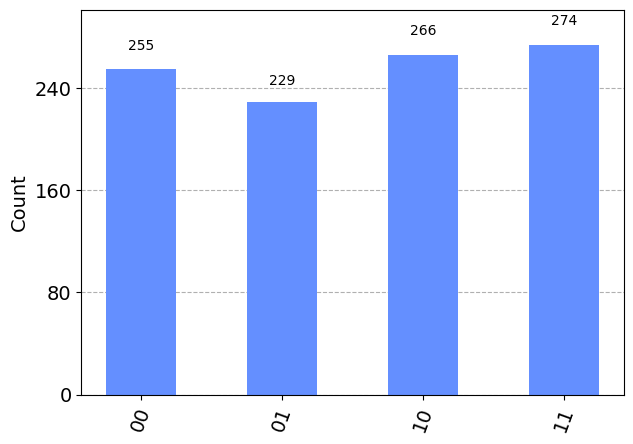

In [3]:
# 1.
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector

# 2.
qc = QuantumCircuit(3, 2)

# 3.
qc.h(0)
qc.barrier()

# 4.
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# 5.
qc.cx(0, 1)
qc.h(0)
qc.barrier()

state_before_measurement = Statevector.from_int(0, 2**3).evolve(qc)
plot_bloch_multivector(state_before_measurement).show()

qc.measure([0, 1], [0, 1])
qc.cx(1, 2)
qc.cz(0, 2)

# 7
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)
